<div style="text-align: center; font-size: 30px; font-weight: bold; margin-bottom: 20px;">
    Program 1
</div>


### **Aim**
Understanding Artificial Neural Networks (ANN) and the role of activation functions in influencing accuracy and data transformation.


### **Theory**

#### Artificial Neural Network (ANN)

An Artificial Neural Network is a computational model inspired by biological neurons. It consists of interconnected layers: an input layer, one or more hidden layers, and an output layer. Each neuron computes a weighted sum of inputs followed by a non-linear activation function that determines the neuron’s output. This structure allows ANNs to approximate complex, non-linear relationships in data.

Mathematically:
[
z = w \cdot x + b, \quad a = f(z)
]
where (f) is the activation function introducing non-linearity. Without non-linearity, even deep networks behave like linear models.


#### Activation Functions

Activation functions control how inputs are transformed before being passed to the next layer. They determine the network’s ability to learn complex patterns by introducing non-linear behavior. Different activation functions influence gradient flow, training stability, convergence speed, and final model accuracy.

* **Sigmoid**
  Maps input values to the range (0, 1). Common in binary classification but suffers from vanishing gradients due to saturation at extreme values.

* **Tanh**
  Similar to sigmoid but outputs values in (−1, 1). Zero-centered output improves gradient flow compared to sigmoid, though it still suffers from saturation.

* **ReLU (Rectified Linear Unit)**
  [
  f(x) = \max(0, x)
  ]
  The most widely used activation function in modern neural networks. It converges faster, mitigates vanishing gradients, and provides sparse activations, improving efficiency.


#### Influence on Accuracy

Activation functions significantly influence the representational power and training dynamics of an ANN.

* **ReLU** generally provides the highest accuracy due to stable gradients and efficient learning.
* **Tanh** can perform well in hidden layers due to centered outputs.
* **Sigmoid** is typically used for output layers in binary classification.

Different activation functions transform data differently within the network, creating distinct decision boundaries and ultimately affecting model performance.

### **Source Code**

#### Importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


#### Loading dataset (Breast Cancer)

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Number of classes:", len(np.unique(y)))


Dataset shape: (569, 30)
Number of classes: 2


In [3]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training with different activation functions

In [ ]:
activations = ["relu", "tanh", "logistic"]   # logistic = sigmoid
accuracies = {}

for act in activations:
    model = MLPClassifier(hidden_layer_sizes=(32, 16),
                          activation=act,
                          max_iter=1000,
                          random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies[act] = acc

accuracies

{'relu': 0.9824561403508771,
 'tanh': 0.956140350877193,
 'logistic': 0.9824561403508771}

#### Visualizing activation functions

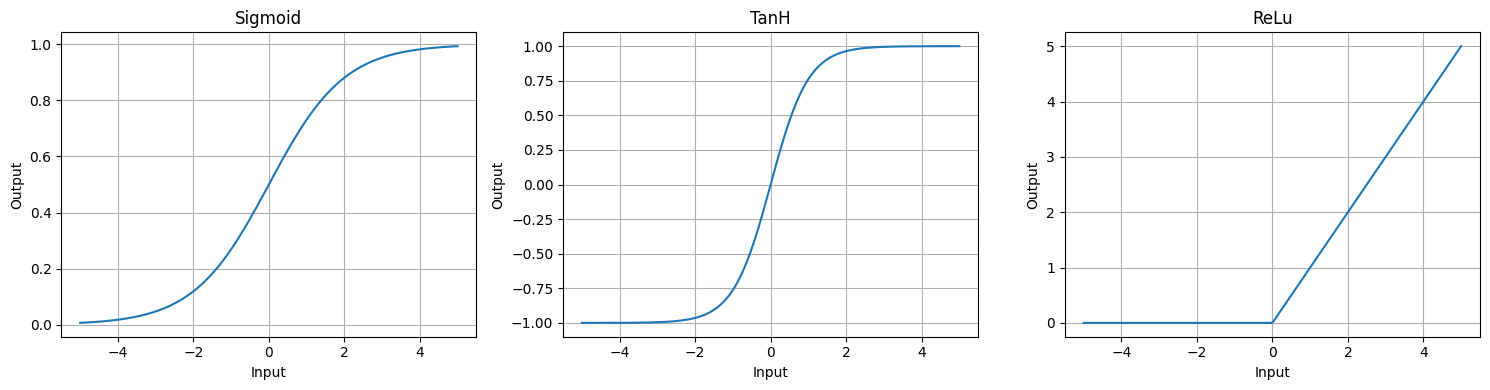

In [7]:
def plot_act_fun(name: str, x_vals, func, idx):
    plt.subplot(1, 3, idx)
    plt.plot(x_vals, func)
    plt.title(name)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)

# Input range
x_vals = np.linspace(-5, 5, 200)

# Activation outputs
sigmoid = 1 / (1 + np.exp(-x_vals))
tanh = np.tanh(x_vals)
relu = np.maximum(0, x_vals)

# Create subplots
plt.figure(figsize=(15, 4))

plot_act_fun("Sigmoid", x_vals, sigmoid, 1)
plot_act_fun("TanH", x_vals, tanh, 2)
plot_act_fun("ReLu", x_vals, relu, 3)

plt.tight_layout()
plt.show()


#### Finding best activation function

In [8]:
best_act = max(accuracies, key=accuracies.get)

print("Best Activation Function:", best_act.upper())

best_model = MLPClassifier(hidden_layer_sizes=(32, 16),
                           activation=best_act,
                           max_iter=1000,
                           random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Best Activation Function: RELU

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

